In [1]:
import numpy as np
import torch
from torch import nn, Tensor

from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [2]:
digits = load_digits()
X = digits['data']
y = digits['target']

In [3]:
enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(y.reshape(-1, 1)).toarray()

In [6]:
X = Tensor(X)
y = Tensor(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
class LogisticReg(nn.Module):
    def __init__(self, x_dim):
        super().__init__()
        self.log_reg = nn.Sequential(
            nn.Linear(x_dim, 200),
            nn.Tanh(),
            nn.Linear(200, 50),
            nn.ReLU(),
            nn.Linear(50, 10),
            nn.Softmax()
        )
        
    def forward(self, x):
        return self.log_reg(x)

In [9]:
model = LogisticReg(X_train.shape[1])
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
losses = []

for i in range(3000):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    losses.append(loss.item())
    
    optim.zero_grad()
    loss.backward()
    optim.step()

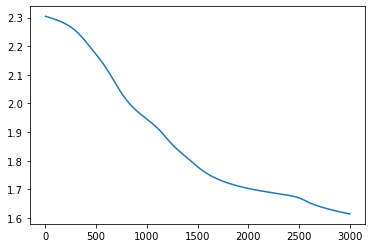

In [11]:
plt.plot(range(len(losses)), losses)

In [12]:
y_pred = model(X_test)
loss_fn(y_pred, y_test)

tensor(1.6554, grad_fn=<DivBackward1>)